In [36]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [2]:
call_center_Data=pd.read_excel('data1.xlsx')
df=call_center_Data.copy()
df

,Call No,Result,Waiting time,Talking time,After call work time
0,IBC1,Answer,10,232,27
1,IBC2,Answer,12,137,26
2,IBC3,Answer,29,123,18
3,IBC4,Answer,16,67,27
4,IBC5,Answer,15,235,21
5,IBC6,Answer,14,118,3
6,IBC7,Answer,6,157,30
7,IBC8,Answer,12,228,11
8,IBC9,Answer,21,197,27
9,IBC10,Answer,18,80,19


In [3]:
df.columns

Index(['Call No', 'Result', 'Waiting time', 'Talking time',
       'After call work time'],
      dtype='object')

In [4]:
df.columns = [col.replace(' ','_') for col in df.columns ]

In [5]:
df.columns

Index(['Call_No', 'Result', 'Waiting_time', 'Talking_time',
       'After_call_work_time'],
      dtype='object')

In [6]:
df['Handling_Time'] = df['Talking_time']+df['After_call_work_time']


In [7]:
df.sample(5)

,Call_No,Result,Waiting_time,Talking_time,After_call_work_time,Handling_Time
11,IBC12,Answer,0,119,21,140
28,IBC29,Answer,1,79,25,104
35,IBC36,Answer,19,95,25,120
2,IBC3,Answer,29,123,18,141
49,IBC50,Abondan,14,0,0,0


In [8]:
def call_center_metric(df, servis_level_percent=80, servis_level_time=20):
    """
    Calculate various metrics for call center performance based on the provided DataFrame.

    Args:
        df (pandas.DataFrame): DataFrame containing call center data.
        servis_level_percent (float, optional): Service level threshold percentage. Defaults to 80.
        servis_level_time (int, optional): Service level threshold time in seconds. Defaults to 20.

    Returns:
        pandas.DataFrame: DataFrame containing the calculated call center metrics.
    """
    total_call = len(df)
    total_answered_call = df.Result.value_counts()[0]
    total_abondan_call = df.Result.value_counts()[1]
    answered_rate = (total_answered_call / total_call) * 100
    abondan_rate = (total_abondan_call / total_call) * 100
    cod1 = df['Result'] == "Answer"
    cod2 = df['Waiting_time'] < servis_level_time
    Number_Calls_Target_Time = len(df[cod1 & cod2])
    sercis_level = (Number_Calls_Target_Time / total_answered_call)* 100
    Average_Time_Abandon = round(df[df['Result'] == "Abondan"]['Waiting_time'].sum() / len(df[df['Result'] == "Abondan"]),2)
    Average_Speed_Answer =round(df[df['Result'] == "Answer"]['Waiting_time'].sum() / len(df[df['Result'] == "Answer"]),2)
    Average_Talk_Time = round(df[df['Result'] == "Answer"]['Talking_time'].sum() / len(df[df['Result'] == "Answer"]),2)
    Average_After_Call_Work_time = round(df[df['Result'] == "Answer"]['After_call_work_time'].sum() / len(df[df['Result'] == "Answer"]),2)
    Average_Handling_Time =round(Average_Talk_Time + Average_After_Call_Work_time,2)
    
    output = pd.DataFrame({
        'Total Call': int(total_call),
        'Answered Call': int(total_answered_call),
        'Answered Rate': int(answered_rate),
        'Number Calls Target Time': Number_Calls_Target_Time,
        'Service Level': sercis_level,
        'Total Abandon Call': total_abondan_call,
        'Abandon Rate': abondan_rate,
        'Average Time Abandon': Average_Time_Abandon,
        'Average Speed Answer': Average_Speed_Answer,
        'Average Talk Time': Average_Talk_Time,
        'Average After Call Work Time': Average_After_Call_Work_time,
        'Average Handling Time': Average_Handling_Time
    }, index=[0])  # Specify the index as a list containing a single element, 0 in this case
    
    report = output.T
    report = report.reset_index()
    report.columns=["Metrics","Value"]
    
    return report


In [9]:
call_center_metric(df)

,Metrics,Value
0,Total Call,50.00
1,Answered Call,45.00
2,Answered Rate,90.00
3,Number Calls Target Time,36.00
4,Service Level,80.00
5,Total Abandon Call,5.00
6,Abandon Rate,10.00
7,Average Time Abandon,12.40
8,Average Speed Answer,13.58
9,Average Talk Time,141.13


In [10]:
call_center_Data2=pd.read_excel('data2.xlsx')
df2=call_center_Data2.copy()
df2

,Agent,Work attendance status,Call Count,Handling Time (sec),Break (min),Lunch Break (min),Education (min),Meeting (min),Login Hour,Logout Hour
0,A1,No,96,199,25,35,16,9,09:00:00,18:00:00
1,A2,No,81,188,29,29,15,15,09:00:00,19:00:00
2,A3,No,94,224,35,35,13,11,09:00:00,19:00:00
3,A4,No,99,158,28,25,20,0,09:05:00,19:00:00
4,A5,No,111,221,27,34,17,9,09:00:00,18:55:00
5,A6,No,103,169,25,26,12,14,09:00:00,19:00:00
6,A7,No,115,175,33,32,4,13,09:00:00,19:00:00
7,A8,No,82,195,25,34,15,1,09:00:00,19:00:00
8,A9,No,80,153,26,34,2,2,09:12:00,19:00:00
9,A10,Yes,0,0,0,0,0,0,00:00:00,00:00:00


In [11]:
df2.columns = [col.replace(' ','_') for col in df2.columns ]

In [12]:
df2.columns 

Index(['Agent', 'Work_attendance_status', 'Call_Count', 'Handling_Time_(sec)',
       'Break_(min)', 'Lunch_Break_(min)', 'Education_(min)', 'Meeting_(min)',
       'Login_Hour', 'Logout_Hour'],
      dtype='object')

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Agent                   20 non-null     object
 1   Work_attendance_status  20 non-null     object
 2   Call_Count              20 non-null     int64 
 3   Handling_Time_(sec)     20 non-null     int64 
 4   Break_(min)             20 non-null     int64 
 5   Lunch_Break_(min)       20 non-null     int64 
 6   Education_(min)         20 non-null     int64 
 7   Meeting_(min)           20 non-null     int64 
 8   Login_Hour              20 non-null     object
 9   Logout_Hour             20 non-null     object
dtypes: int64(6), object(4)
memory usage: 1.7+ KB


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Agent                   20 non-null     object
 1   Work_attendance_status  20 non-null     object
 2   Call_Count              20 non-null     int64 
 3   Handling_Time_(sec)     20 non-null     int64 
 4   Break_(min)             20 non-null     int64 
 5   Lunch_Break_(min)       20 non-null     int64 
 6   Education_(min)         20 non-null     int64 
 7   Meeting_(min)           20 non-null     int64 
 8   Login_Hour              20 non-null     object
 9   Logout_Hour             20 non-null     object
dtypes: int64(6), object(4)
memory usage: 1.7+ KB


In [15]:
# Function to calculate time difference in minutes
def calculate_time_difference(start_time, end_time):
    """
    Calculate the time difference in minutes between two time values.

    Args:
        start_time (datetime.time): Starting time.
        end_time (datetime.time): Ending time.

    Returns:
        int: Time difference in minutes.
    """
    start_minutes = start_time.hour * 60 + start_time.minute
    end_minutes = end_time.hour * 60 + end_time.minute
    difference = end_minutes - start_minutes
    return difference

In [16]:
# Saat farkını hesaplama ve yeni bir sütun ekleyerek DataFrame'i güncelleme
df2['Login_Time(min)'] = df2.apply(lambda row: calculate_time_difference(row['Login_Hour'], row['Logout_Hour']), axis=1)

In [17]:
df2['AHT_(min)'] = ((df2['Call_Count'] * df2['Handling_Time_(sec)'])/60).astype(int)

In [18]:
df2['Diversion'] = df2['Break_(min)'] +df2['Lunch_Break_(min)'] +df2['Education_(min)'] +df2['Meeting_(min)'] 

In [19]:
df2['Occupancy'] = round((df2['AHT_(min)'] / (df2['Login_Time(min)']-df2['Diversion'])) * 100,1)

In [24]:
df2['Shrinkage'] = df2['Lunch_Break_(min)'].apply(lambda x: x - 30 if x > 30 else 0) + df2['Break_(min)'].apply(
    lambda x: x - 30 if x > 30 else 0) + df2['Education_(min)'] + df2['Meeting_(min)']+600-df2['Login_Time(min)']

In [26]:
df2['Shrinkage_Ratio'] = round((df2['Shrinkage']/df2['Login_Time(min)']) *100,2)

In [30]:
df2['Activity Violation'] = df2['Lunch_Break_(min)'].apply(lambda x: 1 if x > 30 else 0) + df2['Break_(min)'].apply(
    lambda x: 1 if x > 30 else 0) + df2['Login_Time(min)'].apply(lambda x: 1 if x < 600 else 0) 

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> We need to correct the data of those who do not attend. If we don't correct the data, we will encounter errors when performing calculations.

</ul>
</div>

In [46]:
df2.loc[df2['Work_attendance_status']=='Yes','Occupancy'] = 0
df2.loc[df2['Work_attendance_status']=='Yes','Shrinkage_Ratio'] = 0
df2.loc[df2['Work_attendance_status']=='Yes','Activity Violation'] = 3

In [47]:
df2

,Agent,Work_attendance_status,Call_Count,Handling_Time_(sec),Break_(min),Lunch_Break_(min),Education_(min),Meeting_(min),Login_Hour,Logout_Hour,Login_Time(min),AHT_(min),Diversion,Occupancy,Shrinkage,Shrinkage_Ratio,Activity Violation
0,A1,No,96,199,25,35,16,9,09:00:00,18:00:00,540,318,85,69.9,90,16.67,2
1,A2,No,81,188,29,29,15,15,09:00:00,19:00:00,600,253,88,49.4,30,5.00,0
2,A3,No,94,224,35,35,13,11,09:00:00,19:00:00,600,350,94,69.2,34,5.67,2
3,A4,No,99,158,28,25,20,0,09:05:00,19:00:00,595,260,73,49.8,25,4.20,1
4,A5,No,111,221,27,34,17,9,09:00:00,18:55:00,595,408,87,80.3,35,5.88,2
5,A6,No,103,169,25,26,12,14,09:00:00,19:00:00,600,290,77,55.4,26,4.33,0
6,A7,No,115,175,33,32,4,13,09:00:00,19:00:00,600,335,82,64.7,22,3.67,2
7,A8,No,82,195,25,34,15,1,09:00:00,19:00:00,600,266,75,50.7,20,3.33,1
8,A9,No,80,153,26,34,2,2,09:12:00,19:00:00,588,204,64,38.9,20,3.40,2
9,A10,Yes,0,0,0,0,0,0,00:00:00,00:00:00,0,0,0,0.0,600,0.00,3


In [66]:
def call_center_metric_2(df):
    """
    Calculate various metrics for call center performance based on the provided DataFrame.

    Args:
        df (pandas.DataFrame): DataFrame containing call center data.
     
    Returns:
        pandas.DataFrame: DataFrame containing the calculated call center metrics.
    """
    Shrinkage = round((df2['Shrinkage'].sum()/df2['Login_Time(min)'].sum())*100,2)
    
    Occupancy = round((df2['AHT_(min)'].sum() /(df2['Login_Time(min)'].sum()-df2['Diversion'].sum())*100),2)
       
    Full_Time_Equivalent= round((df2['Login_Time(min)'].sum()/ 600),2)
    
    output = pd.DataFrame({
        'Shrinkage Ratio': Shrinkage,
        'Occupancy Ratio': Occupancy,
        'Full Time Equivalent': Full_Time_Equivalent
        
    }, index=[0])  # Specify the index as a list containing a single element, 0 in this case
    
    report = output.T
    report = report.reset_index()
    report.columns=["Metrics","Value"]
    
    return report
  


In [67]:
call_center_metric_2(df2)

,Metrics,Value
0,Shrinkage Ratio,10.12
1,Occupancy Ratio,64.47
2,Full Time Equivalent,18.82


## HEADCOUNT FORECAST
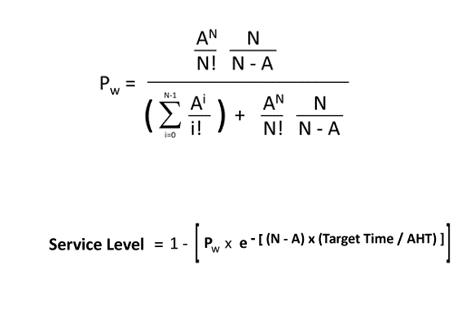

In [171]:
import numpy as np
import math

Number_of_Calls_per_Hour = 200

AHT_Time = 180

Occupancy_Rate_Target = 0.85

Shrinkage = 0.3

Waiting_Time = 20

Baz_Agent_N = 13

Call_Load = (Number_of_Calls_per_Hour * AHT_Time)/60

Traffic_Density_A = Call_Load/60

X = np.power(Traffic_Density_A, Baz_Agent_N) / math.factorial(Baz_Agent_N)

Y = Baz_Agent_N/(Baz_Agent_N-Traffic_Density_A)

Z = X * Y

total_sum = 0

for i in range(0, Baz_Agent_N):
    a = np.power(Traffic_Density_A,i)
    b = math.factorial(i)
    total_sum = total_sum + (a/b)  
    
T = total_sum

PW = Z / (T+Z) 

e = (Baz_Agent_N-Traffic_Density_A) * (Waiting_Time/AHT_Time) * -1

S_l= 1 - PW * math.exp(e)

Shrinkage_Effective_Headcount_Forecast = Baz_Agent_N * (1+Shrinkage)

Occupancy_Effective_Headcount_Forecast = Shrinkage_Effective_Headcount_Forecast * (1 +(1-Occupancy_Rate_Target))

Projected_First_Response_Rate = 1 -PW

Projected_Occupancy_Rate = Traffic_Density_A / Baz_Agent_N

ASA_Forecast = (PW*AHT_Time)/(Baz_Agent_N-Traffic_Density_A)

output = pd.DataFrame({
    'Number of Calls per Hour': Number_of_Calls_per_Hour,
    'AHT Time': AHT_Time,
    'Occupancy Rate Target': Occupancy_Rate_Target*100,
    'Shrinkage': Shrinkage,
    'Waiting Time': Waiting_Time,
    'Baz Agent(N)': Baz_Agent_N,
    'Call Load': Call_Load,
    'Traffic Density (A)': Traffic_Density_A,
    'A N / N! = X ': X,
    'N/(N-A) = Y': Y,
    'X*Y=Z': Z,
    'T': total_sum,
    'PW': PW * 100,
    '-(N – A) * (TargetTime / AHT)': e,
    'SL Formülü':S_l *100,
    'Shrinkage Effective Headcount Forecast': Shrinkage_Effective_Headcount_Forecast ,
    'Occupancy Effective Headcount Forecast': Occupancy_Effective_Headcount_Forecast ,
    'Projected Average Speed Of Answer ':ASA_Forecast,
    'Projected First Response Rate ': Projected_First_Response_Rate * 100,
    'Projected Occupancy Rate ': Projected_Occupancy_Rate * 100 
   

}, index=[0])  # Specify the index as a list containing a single element, 0 in this case

HEADCOUNT_FORECAST = output.T
HEADCOUNT_FORECAST = HEADCOUNT_FORECAST.reset_index()
HEADCOUNT_FORECAST.columns = ["Metrics", "Value"]
HEADCOUNT_FORECAST['Value']= HEADCOUNT_FORECAST.Value.apply(lambda x: round(x,2))

In [172]:
HEADCOUNT_FORECAST

,Metrics,Value
0,Number of Calls per Hour,200.00
1,AHT Time,180.00
2,Occupancy Rate Target,85.00
3,Shrinkage,0.30
4,Waiting Time,20.00
5,Baz Agent(N),13.00
6,Call Load,600.00
7,Traffic Density (A),10.00
8,A N / N! = X,1605.90
9,N/(N-A) = Y,4.33
